In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from lib import compare_imgs_with_figsize
compare = compare_imgs_with_figsize(figsize=(10, 10))

# Segmentation using math

## ramp
- first order derivative is constant
- 2nd order is zero
- opposite values in 2nd order indicate edge. (-1, ..., 1) means light to dark. (1, ..., -1) mean dark to light

## step
- if opposite values in ramp are very close to each other

## isolated point/ lines
- sharp values in 2nd derivative

# Mathematical Segmentation Criteria

## Ramp
- **1st Derivative:** Constant
- **2nd Derivative:** Zero
- **Edge Detection:** Opposite values in 2nd order indicate an edge. (-1 to 1) represents a transition from light to dark, and (1 to -1) signifies a transition from dark to light.

## Step
- **Criterion:** If opposite values in the ramp function are very close to each other.

## Isolated Points/Lines
- **Criterion:** Sharp values in the 2nd order derivative indicate isolated points or lines.

In [ ]:
img = cv2.imread('assets/lena-v2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
bw_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

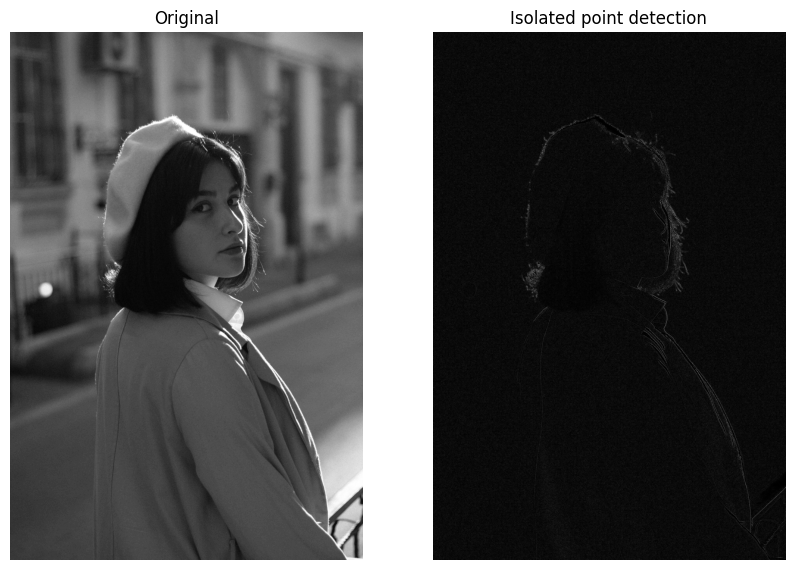

In [ ]:
# Isolated point detection
kernel = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

point_filtered = cv2.filter2D(bw_img, -1, kernel)

compare(bw_img, 'Original', point_filtered, 'Isolated point detection')

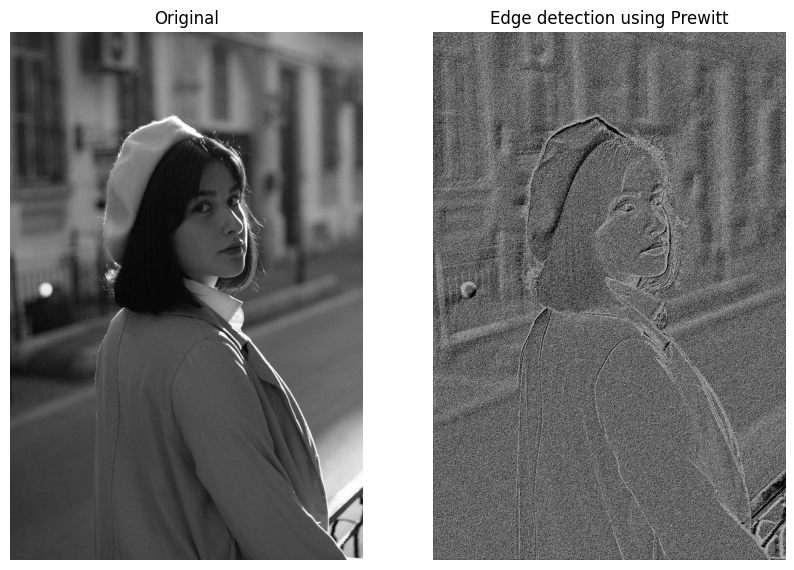

In [ ]:
prewitt_filtered_h = cv2.filter2D(bw_img, -1, np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
]))
prewitt_filtered_v = cv2.filter2D(bw_img, -1, np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]))
prewitt_filtered = np.sqrt(prewitt_filtered_h**2 + prewitt_filtered_v**2)
compare(bw_img, 'Original', prewitt_filtered, 'Edge detection using Prewitt')

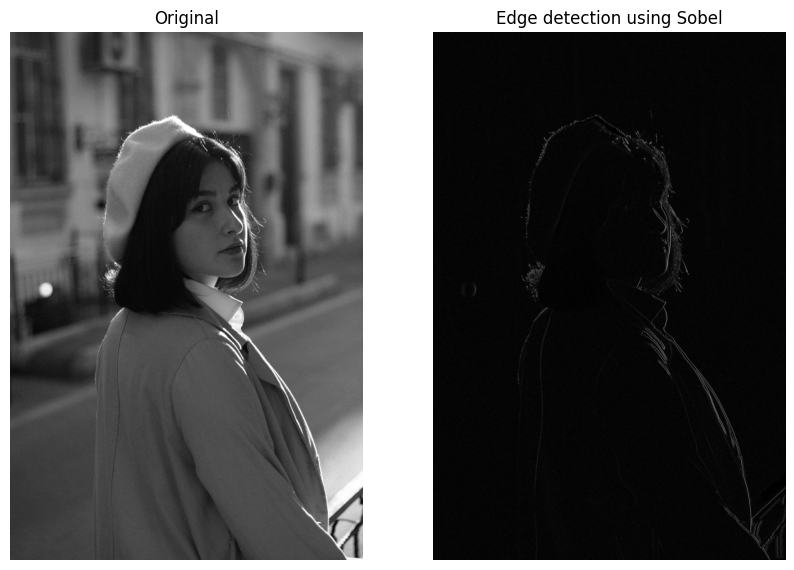

In [ ]:
sobel_x = cv2.Sobel(bw_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(bw_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_filtered = np.sqrt(sobel_x**2 + sobel_y**2)
compare(bw_img, 'Original', sobel_filtered, 'Edge detection using Sobel')

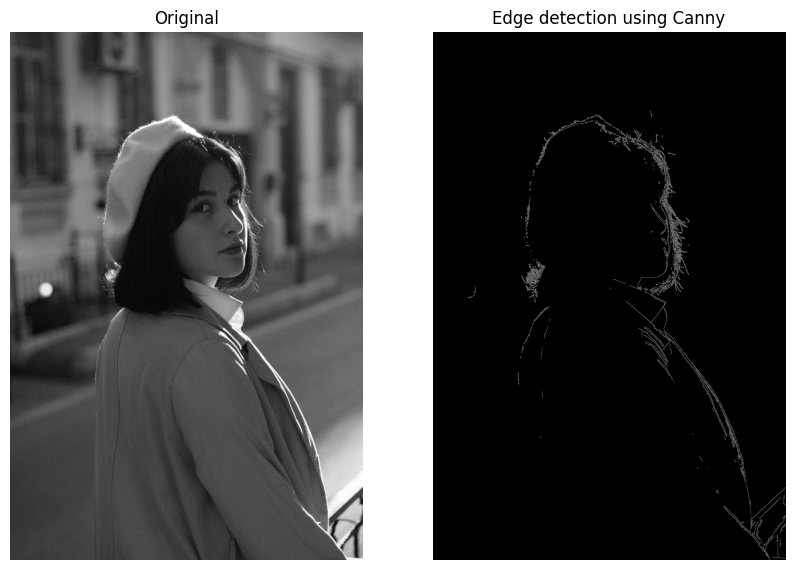

In [ ]:
canny_filtered = cv2.Canny(bw_img, 100, 200)
compare(bw_img, 'Original', canny_filtered, 'Edge detection using Canny')

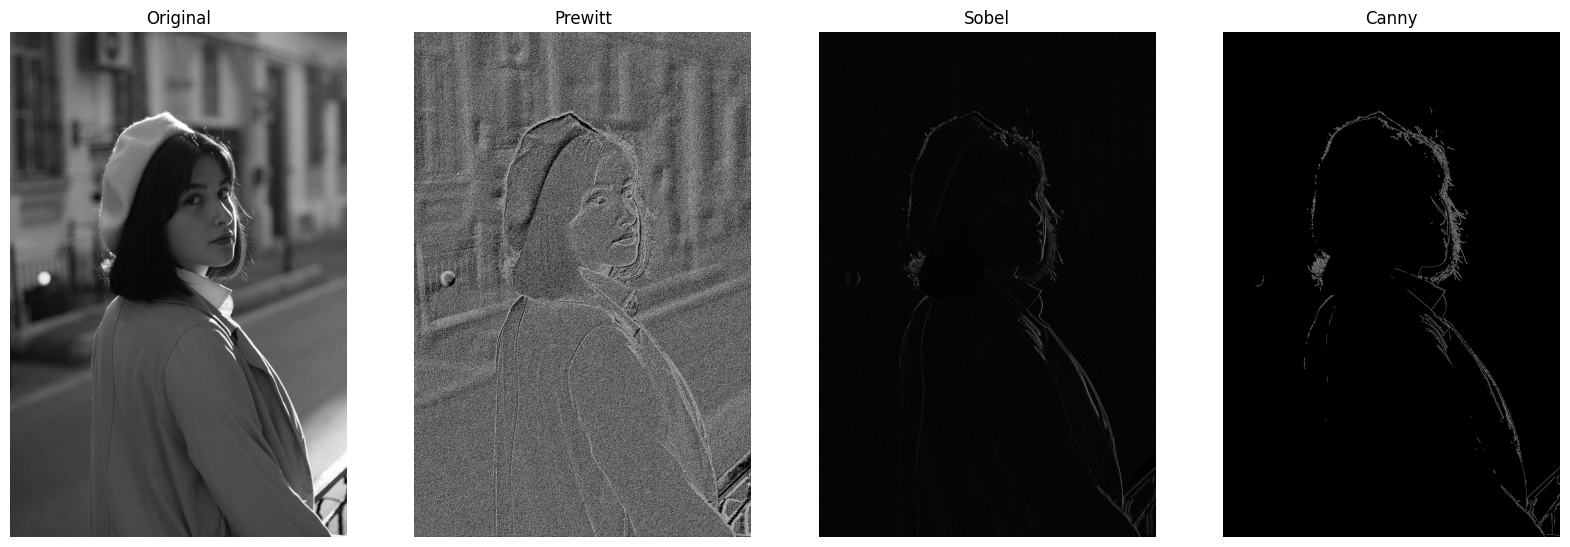

In [ ]:
# compare all
compare(bw_img, 'Original',
        prewitt_filtered, 'Prewitt',
        sobel_filtered, 'Sobel',
        canny_filtered, 'Canny',
        # grid_shape=(2, 2),
        figsize=(20, 15)
)

(array([111553., 206377., 204731.,      0., 205986., 203263.,      0.,
        199776., 196565., 193655.,      0., 190593., 186574.,      0.,
        181656., 178081., 173411.,      0., 167664., 162101.,      0.,
        157424., 152147.,      0., 145124., 139865., 133589.,      0.,
        128214., 122062.,      0., 116625., 110262., 104288.,      0.,
         98867.,  94029.,      0.,  87953.,  82674.,      0.,  77436.,
         73344.,  68771.,      0.,  63766.,  59039.,      0.,  55433.,
         51355.,  47455.,      0.,  44254.,  40627.,      0.,  37108.,
         34388.,  31453.,      0.,  29009.,  26707.,      0.,  24507.,
         22005.,      0.,  20337.,  18716.,  16925.,      0.,  15492.,
         13849.,      0.,  12732.,  11495.,  10450.,      0.,   9716.,
          8742.,      0.,   7919.,   7041.,      0.,   6637.,   5876.,
          5410.,      0.,   4876.,   4629.,      0.,   4071.,   3919.,
          3552.,      0.,   3167.,   2890.,      0.,   2651.,   2586.,
      

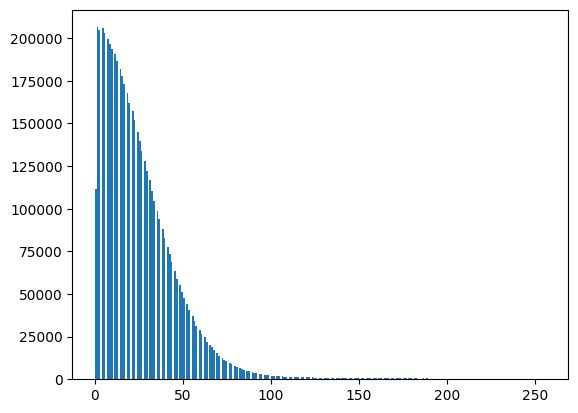

In [ ]:
# Finding distribution of values in sobel_filtered
plt.hist(sobel_filtered.ravel(), 256, [0, 256])

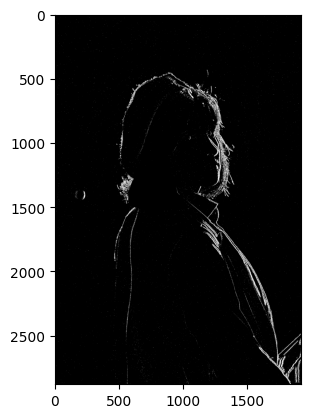

In [ ]:
# filter sobel to threshold
thres = 100
sobel_thresholded = sobel_filtered.copy()
sobel_thresholded[sobel_filtered < thres] = 0
sobel_thresholded[sobel_filtered >= thres] = 255
plt.imshow(sobel_thresholded, cmap='gray')

In [ ]:
# make a slider to change threshold
from ipywidgets import interact, IntSlider
def threshold(thres):
    sobel_thresholded = sobel_filtered.copy()
    sobel_thresholded[sobel_filtered < thres] = 0
    sobel_thresholded[sobel_filtered >= thres] = 255
    plt.imshow(sobel_thresholded, cmap='gray')
interact(threshold, thres=IntSlider(min=50, max=150, step=1, value=100))
